1. Perform EDA to the data
2. LDA to the data
3. Plots:
    1. Scatter plot
    2. 1D plot (KDE plot)
    3. Explained Variance plot
    4. Decision Boundary plot
4. Metric
    1. Accuracy
    2. Precision
    3. Recall
    4. F1 Score
    5. ROC & AUC Curve
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\admin\AppData\Local\Temp\ipykernel_2376\2446953833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


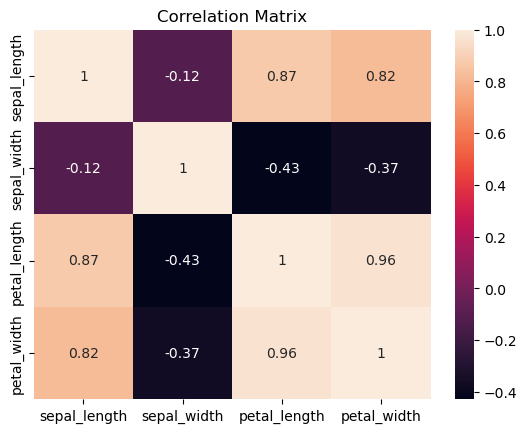

In [5]:
# plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize,StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc , confusion_matrix
from sklearn.metrics import classification_report 
plt.rcParams["font.size"] = 10

In [7]:
X=df.drop(['species'],axis=1)
y=df["species"]
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
df["species"].unique()
labels=['setosa', 'versicolor', 'virginica']

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

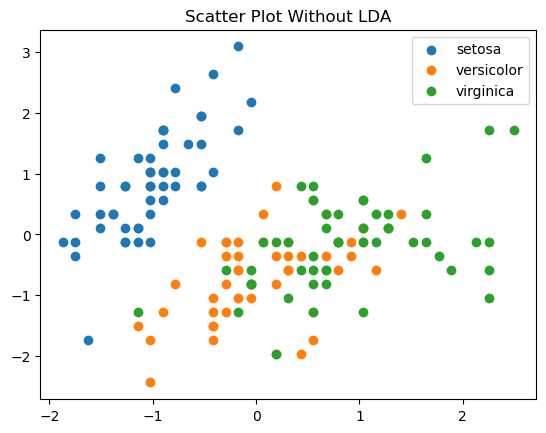

In [12]:
unique_labels = np.unique(y)
for label in unique_labels:
    X_label = X[y == label]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=label)
plt.title("Scatter Plot Without LDA")
plt.legend(['setosa', 'versicolor', 'virginica'], bbox_to_anchor = (1 , 1))
plt.show()

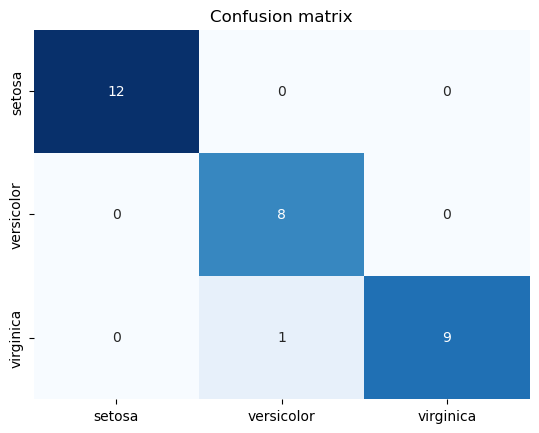

In [15]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=23)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_m = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_m,annot=True,cmap="Blues",cbar=False,xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



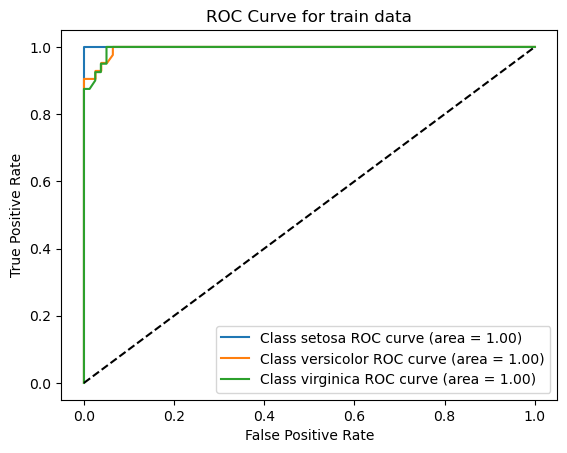

In [17]:
y_binarized = label_binarize(y_train, classes=np.unique(y))
# Plot ROC curve for each class
for i in range(y_binarized.shape[1]):
    y_scores = classifier.predict_proba(X_train)[:, i]
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {labels[i]} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train data')
plt.legend()
plt.show()

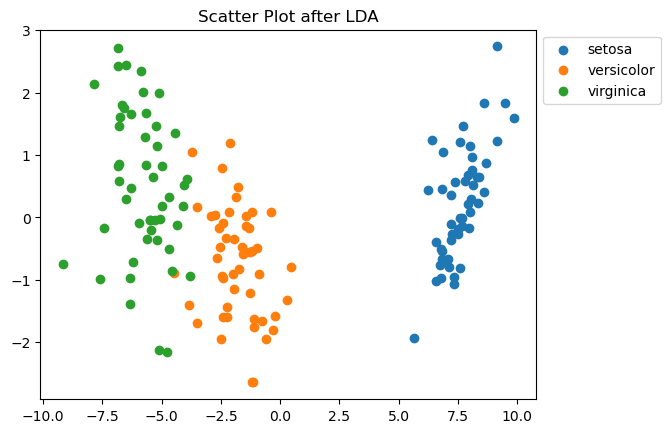

In [18]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_LDA = lda.fit_transform(X, y)

unique_labels = np.unique(y)
for label in unique_labels:
    X_label = X_LDA[y == label]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=label)
plt.title("Scatter Plot after LDA")
plt.legend(['setosa', 'versicolor', 'virginica'], bbox_to_anchor = (1 , 1))
plt.show()

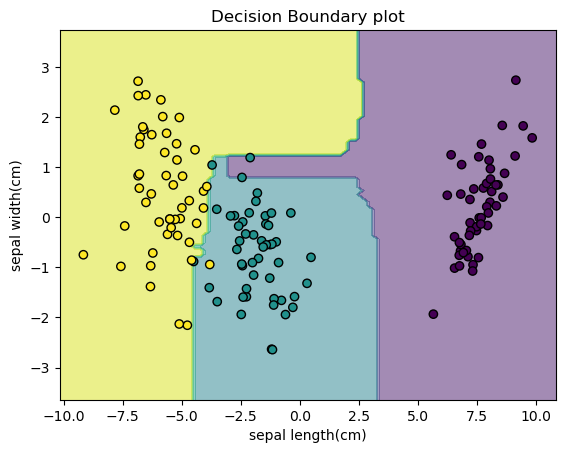

In [34]:
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X_LDA, response_method="predict",
    xlabel='sepal length(cm)', ylabel='sepal width(cm)',
    alpha=0.5,
)
disp.ax_.scatter(X_LDA[:, 0], X_LDA[:, 1], c=iris.target, edgecolor="k")
plt.title("Decision Boundary plot")
plt.show()

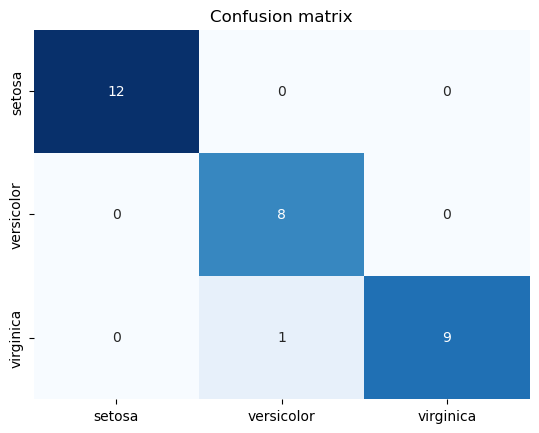

In [30]:
X_train, X_test,y_train, y_test = train_test_split(X_LDA, y,test_size=0.2,random_state=23)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

conf_m = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_m,annot=True,cmap="Blues",cbar=False,xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



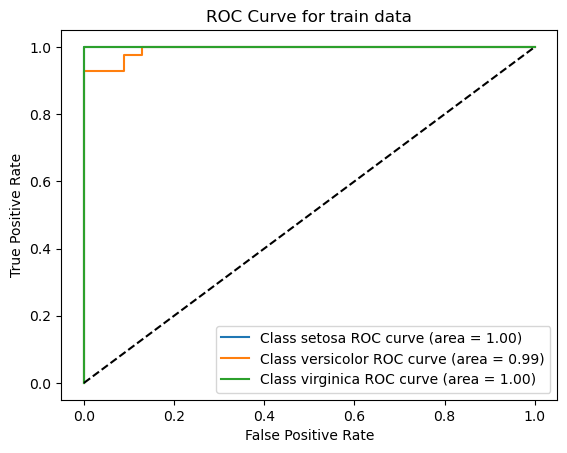

In [21]:
y_binarized = label_binarize(y_train, classes=np.unique(y))
# Plot ROC curve for each class
for i in range(y_binarized.shape[1]):
    y_scores = classifier.predict_proba(X_train)[:, i]
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {labels[i]} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for train data')
plt.legend()
plt.show()